# Inspect ERS file with magnetic data

Some links: 

For getting data: https://dirmin.no/data

For getting the magnetic maps: https://geo.ngu.no/geoscienceportalopen/Results?bookmark=3cbc4c8d7e304e2cac3ed830b50606bc#pSingleDatasetGeneral 

For getting the nominal mining rights maps: https://minit.dirmin.no/kart/


CRS: EPSG:32632
Resolution: (10.0, -10.0)
Shape (rows, cols): (1126, 997)
Bounds: (512156.088814, 6560852.07563, 522126.088814, 6572112.07563)
NoData: nan
Total datapoints: 699936
Number of negative values: 2399
Min: -312.1206359863281
Max: 2050.03515625
Mean: 141.57162475585938
Variance: 34557.74609375


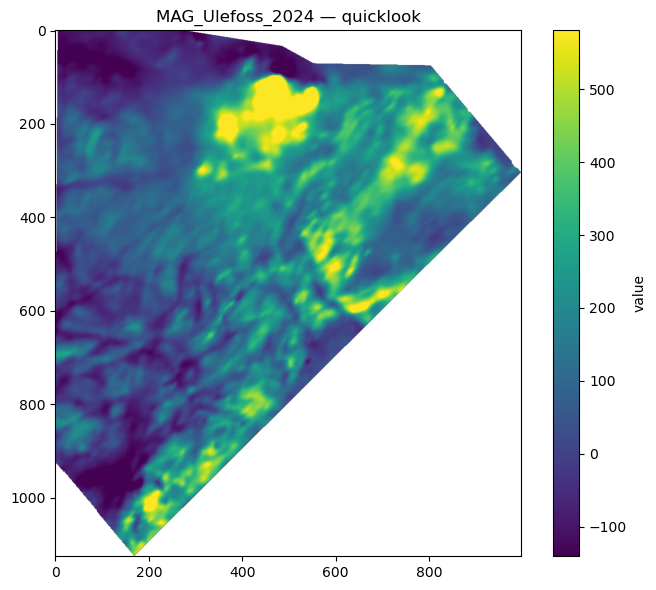

In [324]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt

# Path to your raster
#ERS_PATH = "/Users/erlend/RareEarthProject/MAG_Ulefoss_2024/TMI.ERS"
ERS_PATH = "/Users/erlend/RareEarthProject/MAG_Ulefoss_2024/TMI.ERS"

# Load raster
da = rxr.open_rasterio(ERS_PATH, masked=True).squeeze(drop=True)

print("CRS:", da.rio.crs)
print("Resolution:", da.rio.resolution())
print("Shape (rows, cols):", da.shape)
print("Bounds:", da.rio.bounds())
print("NoData:", da.rio.nodata)

# Get numpy array and flatten valid values
vals = da.values
valid = vals.compressed() if np.ma.isMaskedArray(vals) else vals.ravel()
valid = valid[np.isfinite(valid)]

# Stats
total_points = valid.size
count_neg = (valid > 1000).sum()

min_val = valid.min()
max_val = valid.max()
mean_val = valid.mean()
var_val = valid.var()  # ddof=0 for population variance

print(f"Total datapoints: {total_points}")
print(f"Number of negative values: {count_neg}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Mean: {mean_val}")
print(f"Variance: {var_val}")

# Stretch for display (2–98 percentile)
p2, p98 = np.percentile(valid, [2, 98]) if valid.size else (None, None)

plt.figure(figsize=(7, 6))
im = plt.imshow(vals, vmin=p2, vmax=p98)
plt.colorbar(im, label="value")
plt.title("MAG_Ulefoss_2024 — quicklook")
plt.tight_layout()
plt.show()


# Inspect CSV file with mineral rights

In [2]:
# Check the first few lines without parsing
with open("/Users/erlend/RareEarthProject/bergrettigheter.csv", "r", encoding="utf-8") as f:
    for i in range(3):
        print(f.readline())

Rettighetsnummer;Rettighetsnavn;Rettighetstype;Rettighetshaver;Organisasjonsnummer;Status;Mottatt;Godkjent;Mineral;Kommunenummer;Kommunenavn;Fylkesnummer;Fylkesnavn;Geometri

0011/1981-TB;Bergmester 5;UTVINNINGSRETT;Staten;974760282;Godkjent;1981-03-30;1981-09-23;Jern,Vanadium;1557,1506;Gjemnes,Molde;15;Møre og Romsdal;POLYGON ((8.07200388777465 62.8394968948066,8.07590627637884 62.8416589676919,8.0935463489811 62.8442092220318,8.09494208251876 62.8420587285935,8.07200388777465 62.8394968948066))

0001/1982-TB;Hersjø 1;UTVINNINGSRETT;Hessjøgruva AS;996601536;Godkjent;1982-05-28;1982-09-07;Kobber,Py,Sink;5026;Holtålen;50;Trøndelag - Trööndelage;POLYGON ((11.104453184475 62.6815912285269,11.1259832005042 62.6856581797543,11.1278096984097 62.6835892855153,11.1062809409298 62.6795226205579,11.104453184475 62.6815912285269))



In [3]:
import pandas as pd 

df = pd.read_csv("/Users/erlend/RareEarthProject/bergrettigheter.csv",
    sep=";")

print(df.columns)
print(df["Geometri"][0])
df.head()

Index(['Rettighetsnummer', 'Rettighetsnavn', 'Rettighetstype',
       'Rettighetshaver', 'Organisasjonsnummer', 'Status', 'Mottatt',
       'Godkjent', 'Mineral', 'Kommunenummer', 'Kommunenavn', 'Fylkesnummer',
       'Fylkesnavn', 'Geometri'],
      dtype='object')
POLYGON ((8.07200388777465 62.8394968948066,8.07590627637884 62.8416589676919,8.0935463489811 62.8442092220318,8.09494208251876 62.8420587285935,8.07200388777465 62.8394968948066))


Rettighetsnummer Rettighetsnavn  Rettighetstype  Rettighetshaver  \
0     0011/1981-TB   Bergmester 5  UTVINNINGSRETT           Staten   
1     0001/1982-TB       Hersjø 1  UTVINNINGSRETT   Hessjøgruva AS   
2     0002/1982-TB       Hersjø 2  UTVINNINGSRETT   Hessjøgruva AS   
3     0003/1982-TB       Hersjø 3  UTVINNINGSRETT   Hessjøgruva AS   
4     0001/1986-NB     Ørtfjell 1  UTVINNINGSRETT  Rana Gruber ASA   

  Organisasjonsnummer    Status     Mottatt    Godkjent         Mineral  \
0           974760282  Godkjent  1981-03-30  1981-09-23   Jern,Vanadium   
1           996601536  Godkjent  1982-05-28  1982-09-07  Kobber,Py,Sink   
2           996601536  Godkjent  1982-05-28  1982-09-07  Kobber,Py,Sink   
3           996601536  Godkjent  1982-05-28  1982-09-07  Kobber,Py,Sink   
4           953049724  Godkjent  1986-07-16  1986-09-08            Jern   

  Kommunenummer    Kommunenavn Fylkesnummer               Fylkesnavn  \
0     1557,1506  Gjemnes,Molde           15          Møre og Romsdal   
1          5026       Holtålen           50  Trøndelag - Trööndelage   
2          5026       Holtålen           50  Trøndelag - Trööndelage   
3          5026       Holtålen           50  Trøndelag - Trööndelage   
4          1833           Rana           18    Nordland - Nordlánnda   

                                            Geometri  
0  POLYGON ((8.07200388777465 62.8394968948066,8....  
1  POLYGON ((11.104453184475 62.6815912285269,11....  
2  POLYGON ((11.1062809409298 62.6795226205579,11...  
3  POLYGON ((11.1134897576838 62.6784709055023,11...  
4  POLYGON ((14.6724953757499 66.4198129300522,14...

In [4]:
exclude_column = 'Geometri'
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', None,
                       'display.max_colwidth', None):
    for col in df.columns:
        if col == "Kommunenavn":
            print(f"\nColumn: {col}")
            print(df[col].value_counts(dropna=False))



Column: Kommunenavn
Kommunenavn
Guovdageaidnu - Kautokeino                               190
Kárášjohka - Karasjok                                    116
Aarborte - Hattfjelldal                                  108
Fauske - Fuossko                                          91
Hammerfest - Hámmerfeasta                                 86
Rana                                                      78
Hábmer - Hamarøy                                          70
Narvik                                                    67
Eigersund                                                 56
Alta                                                      39
Porsanger - Porsáŋgu - Porsanki                           34
Sørfold                                                   31
Sokndal                                                   31
Raarvihke - Røyrvik                                       28
Nome                                                      27
Holtålen                                            

In [209]:
#Filter so we just look at Nome county
mining_rights = df[df['Kommunenavn'] == 'Nome']

exclude_column = 'Geometri'
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', None,
                       'display.max_colwidth', None):
    for col in mining_rights.columns:
        if col == "Rettighetshaver":
            print(f"\nColumn: {col}")
            print(mining_rights[col].value_counts(dropna=False))


mining_rights_REE = df[df['Rettighetshaver'] == 'SAGA RARE EARTHS AS']

mining_rights_REE.head()




Column: Rettighetshaver
Rettighetshaver
Rare Earths Norway AS    13
Norway Minerals AS        5
SAGA RARE EARTHS AS       4
FEN HOLDING AS            3
REE EXPLORATION AS        2
Name: count, dtype: int64


Rettighetsnummer Rettighetsnavn      Rettighetstype      Rettighetshaver  \
94      0001-1/2014   Bjørndalen A      UTVINNINGSRETT  SAGA RARE EARTHS AS   
95      0002-1/2014   Bjørndalen B      UTVINNINGSRETT  SAGA RARE EARTHS AS   
96      0003-1/2014   Bjørndalen C      UTVINNINGSRETT  SAGA RARE EARTHS AS   
97      0115-1/2014   Fensmyra Øst  UNDERSOEKELSESRETT  SAGA RARE EARTHS AS   

   Organisasjonsnummer    Status     Mottatt    Godkjent  \
94           990800073  Godkjent  2013-11-15  2014-02-27   
95           990800073  Godkjent  2013-11-15  2014-02-27   
96           990800073  Godkjent  2013-11-15  2014-02-27   
97           990800073  Godkjent  2014-03-24  2014-06-13   

                            Mineral Kommunenummer Kommunenavn Fylkesnummer  \
94  Dy,Eu,Hf,Pr,Sm,Tb,Thorium,Tm,Yb          4018        Nome           40   
95  Dy,Eu,Hf,Pr,Sm,Tb,Thorium,Tm,Yb          4018        Nome           40   
96  Dy,Eu,Hf,Pr,Sm,Tb,Thorium,Tm,Yb          4018        Nome           40   
97                      Lantanidene          4018        Nome           40   

   Fylkesnavn                                           Geometri  
94   Telemark  POLYGON ((9.30832942933659 59.2725598341191,9....  
95   Telemark  POLYGON ((9.30400319735471 59.2714115436462,9....  
96   Telemark  POLYGON ((9.30169804098746 59.2646816561318,9....  
97   Telemark  POLYGON ((9.31352230459633 59.2725204939629,9....

In [169]:
print(mining_rights_REE["Geometri"].iloc[0])

MULTIPOLYGON (((9.30400320005023 59.2714115471365,9.32175590582284 59.2712043804597,9.3216935320148 59.2645888887048,9.3038203758802 59.2646717852619,9.30400320005023 59.2714115471365)), ((9.30832943202805 59.2725598376053,9.32176838254417 59.2725273235351,9.32175590582284 59.2712043804597,9.30819270435043 59.2713632630488,9.30832943202805 59.2725598376053)), ((9.29537389406522 59.2635825989241,9.32168345911206 59.2635202524977,9.32162929825007 59.2577729622846,9.29532416270044 59.2578352945511,9.29537389406522 59.2635825989241)), ((9.30838276400326 59.2784597841793,9.32182403896911 59.2784272625246,9.32176838254417 59.2725273235351,9.30832943202805 59.2725598376053,9.30838276400326 59.2784597841793)), ((9.3018690009337 59.2840069185013,9.3194192166443 59.2839650604941,9.31936741134278 59.2784333100318,9.30182004192175 59.2784751588853,9.3018690009337 59.2840069185013)), ((9.3016980436727 59.2646816596339,9.3216935320148 59.2645888887048,9.32168345911206 59.2635202524977,9.301688199919

# Upgrade to geopandas

In [211]:
import geopandas as gpd
import pandas as pd

gdf = gpd.read_file("/Users/erlend/RareEarthProject/bergrettigheter.csv",
    sep=";")


exclude_column = 'Geometri'
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', None,
                       'display.max_colwidth', None):
    for col in mining_rights.columns:
        if col == "Rettighetshaver":
            print(f"\nColumn: {col}")
            print(mining_rights[col].value_counts(dropna=False))

# 3) Further filter to only REE EXPLORATION AS
data_REE = gdf[
    (gdf['Organisasjonsnummer'] == '926114174') |
    (
        (gdf['Organisasjonsnummer'] == '918662049') &
        (gdf['Rettighetsnavn'].str.contains('Fen', na=False))
    )
    |(gdf['Organisasjonsnummer'] == '990800073') 
]


print(len(data_REE))
#data_REE = gdf[gdf['Organisasjonsnummer'] == '827062472']
#data_REE

#data_REE = gdf[gdf['Fylkesnummer'] == '40']


#data_REE = data_REE[data_REE["Organisasjonsnummer"] == '926114174']


#data_REE.head()
#data_competitor.head()

#len(data_REE)


Column: Rettighetshaver
Rettighetshaver
Rare Earths Norway AS    13
Norway Minerals AS        5
SAGA RARE EARTHS AS       4
FEN HOLDING AS            3
REE EXPLORATION AS        2
Name: count, dtype: int64
15


/Users/erlend/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver CSV does not support open option SEP
  return ogr_read(


In [212]:
from shapely import wkt

data_REE["geometry"] = data_REE["Geometri"].apply(wkt.loads)

data_REE_gdp = gpd.GeoDataFrame(data_REE, geometry="geometry", crs="EPSG:4326")


assert isinstance(data_REE_gdp, gpd.GeoDataFrame), "data_REE must be a GeoDataFrame"
assert data_REE_gdp.crs is not None, "data_REE has no CRS; set it if needed (e.g. EPSG:4326)"
print("raster CRS:", da.rio.crs, "| polygons CRS:", data_REE_gdp.crs)


raster CRS: EPSG:32632 | polygons CRS: EPSG:4326


/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/149847642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_REE["geometry"] = data_REE["Geometri"].apply(wkt.loads)


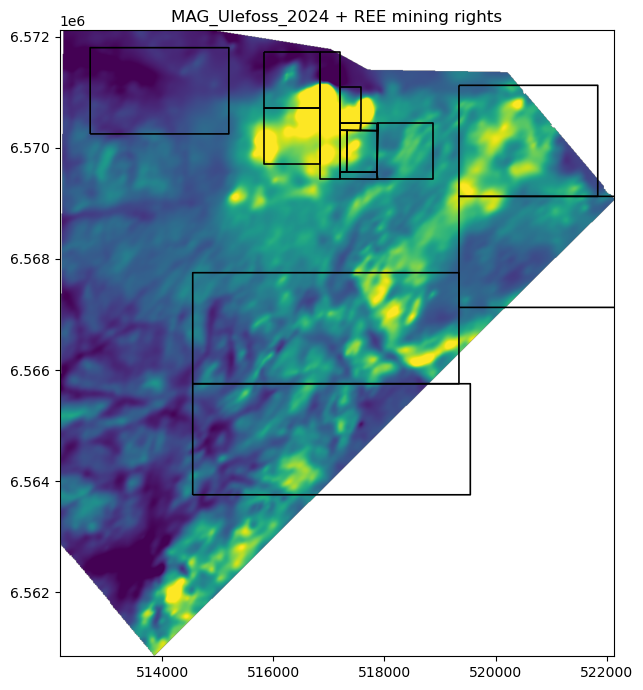

In [214]:
import numpy as np, matplotlib.pyplot as plt

# Reproject polygons → raster CRS
gdf_proj = data_REE_gdp.to_crs(da.rio.crs)

# Robust stretch for the raster
vals = da.values
valid = vals.compressed() if np.ma.isMaskedArray(vals) else vals.ravel()
valid = valid[np.isfinite(valid)]
vmin, vmax = np.percentile(valid, [2, 98]) if valid.size else (None, None)

# Raster extent
minx, miny, maxx, maxy = da.rio.bounds()

# Plot
fig, ax = plt.subplots(figsize=(8,7))
ax.imshow(vals, extent=[minx, maxx, miny, maxy], origin="upper",
          vmin=vmin, vmax=vmax, cmap="viridis")
gdf_proj.boundary.plot(ax=ax, color="black", linewidth=1.2)
ax.set_title("MAG_Ulefoss_2024 + REE mining rights")
ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
plt.tight_layout(); plt.show()


/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/875005016.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rgba = cm.get_cmap("gist_ncar")(norm(arr))
/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/875005016.py:84: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = gdf4326.unary_union.centroid
/Users/erlend/anaconda3/lib/python3.12/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)



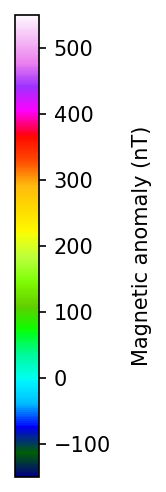
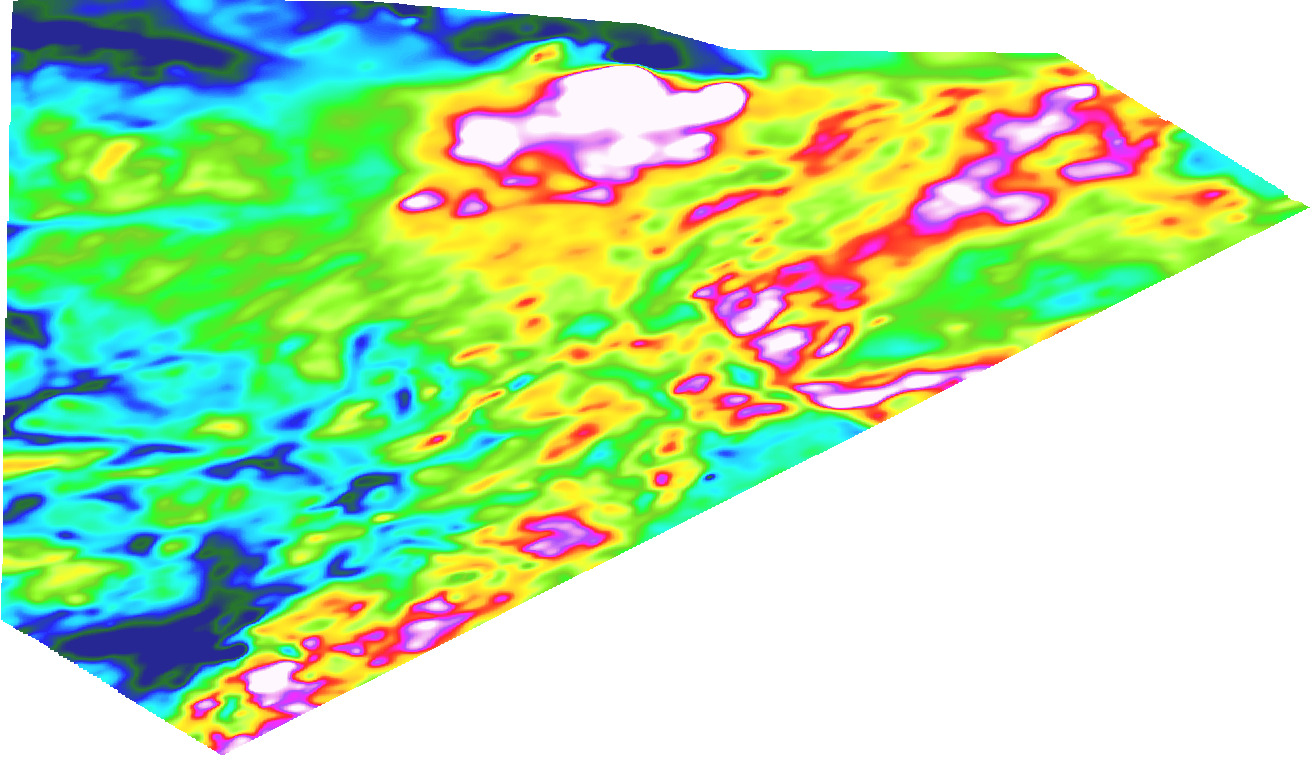

In [325]:
import numpy as np
from matplotlib import colors
from PIL import Image
import folium
import rioxarray as rxr

from shapely.geometry import mapping



# --- Reproject raster to EPSG:4326 for web maps ---
da4326 = da.rio.reproject("EPSG:4326")

# --- Build RGBA PNG with transparency ---
arr = da4326.values
if arr.ndim == 3 and arr.shape[0] == 1:
    arr = arr[0]  # ensure 2D
arr = arr.astype(float)
mask = np.isfinite(arr)

#norm = colors.Normalize(vmin=-150, vmax=550, clip=True)
#rgba = plt.cm.gist_ncar(norm(arr))
#rgba[..., 3] = 0.0
#rgba[..., 3][mask] = 0.85
#rgba_u8 = (rgba * 255).astype(np.uint8)



norm = colors.Normalize(vmin=-150, vmax=550, clip=True)
rgba = cm.get_cmap("gist_ncar")(norm(arr))
rgba[..., 3] = 0.0
rgba[..., 3][mask] = 0.85
rgba_u8 = (rgba * 255).astype(np.uint8)

Image.fromarray(rgba_u8, mode="RGBA").save("mag_overlay.png")

# --- 3) Bounds for overlay ---
minx, miny, maxx, maxy = da4326.rio.bounds()
bounds = [[miny, minx], [maxy, maxx]]

# --- 4) Polygons to EPSG:4326 ---
gdf4326 = data_REE_gdp.to_crs(4326)

#Add avergage and max magnetif fields: 

avg_list, max_list = [], []
for geom in gdf4326.geometry:
    try:
        clipped = da4326.rio.clip([mapping(geom)], gdf4326.crs, drop=True)
        vals = clipped.values
        if vals.ndim == 3 and vals.shape[0] == 1:
            vals = vals[0]  # 2D

        finite = np.isfinite(vals)
        if finite.any():
            mean_nt = float(np.nanmean(vals))
            max_nt  = float(np.nanmax(vals))
        else:
            mean_nt = np.nan
            max_nt  = np.nan
    except Exception:
        mean_nt = np.nan
        max_nt  = np.nan

    avg_list.append(mean_nt)
    max_list.append(max_nt)

gdf4326["AvgMag_nT"] = avg_list
gdf4326["MaxMag_nT"] = max_list
gdf4326["AvgMag_nT_str"] = gdf4326["AvgMag_nT"].map(lambda x: f"{x:.1f}" if np.isfinite(x) else "N/A")
gdf4326["MaxMag_nT_str"] = gdf4326["MaxMag_nT"].map(lambda x: f"{x:.1f}" if np.isfinite(x) else "N/A")



# --- 5) Assign fixed colours by Rettighetshaver ---
unique_owners = gdf4326["Rettighetshaver"].unique()
base_colors = ["green", "blue", "red"]
colors_map = {
    owner: base_colors[i % len(base_colors)]
    for i, owner in enumerate(unique_owners)
}

# --- 6) Folium base map ---
centroid = gdf4326.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=12, tiles="OpenStreetMap", control_scale=True)

# --- 7) Add raster overlay ---
folium.raster_layers.ImageOverlay(
    name="Magnetic survey",
    image="mag_overlay.png",
    bounds=bounds,
    opacity=0.7,
    interactive=False,
).add_to(m)

# --- 8) Add polygons with colours by Rettighetshaver
style = lambda f: {
    "color": colors_map[f["properties"]["Rettighetshaver"]],
    "weight": 2.5,
    "fillOpacity": 0.,
}
folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=[
            "Rettighetshaver",
            "Rettighetsnavn",
            "Rettighetstype",
            "Organisasjonsnummer",
            "Status",
            "Mineral",
            "Kommunenavn",
            "AvgMag_nT_str",
            "MaxMag_nT_str"

        ],
        aliases=[
            "Owner",
            "Name",
            "Type",
            "Organisation number",
            "Status",
            "Minerals",
            "Municipality",
            "Average magnetic activity (nT)",
            "Max magnetic activity (nT)"
        ],
        sticky=False,
    ),
).add_to(m)

# --- 9) Add labels (last token of Rettighetsnavn) ---
for _, row in gdf4326.iterrows():
    c = row.geometry.representative_point()
    last_token = row["Rettighetsnavn"].split()[-1]
    folium.Marker(
        location=[c.y, c.x],
        icon=folium.DivIcon(
            icon_size=(0, 20),
            html=f'<div style="font-size:10pt; color:black;"><b>{last_token}</b></div>',
        ),
    ).add_to(m)

# --- 10) Add legend ---
legend_html = """
<div style="
    position: fixed; 
    bottom: 550px; left: 50px; width: 200px;  padding: 4px; border-radius: 5px;
    background-color: white; 
    border:2px solid grey; 
    z-index:9999; 
    font-size:15px;
    ">
<b>Mining rights</b><br>
"""
for owner, color in colors_map.items():
    legend_html += f'<i style="background:{color};width:10px;height:10px;display:inline-block;"></i> {owner}<br>'
legend_html += "</div>"

m.get_root().html.add_child(folium.Element(legend_html))


# --- Create vertical Matplotlib colorbar ---
fig, ax = plt.subplots(figsize=(0.4, 4))
fig.subplots_adjust(left=0.5)
cb = plt.colorbar(
    cm.ScalarMappable(norm=norm, cmap="gist_ncar"),
    cax=ax,
    orientation="vertical",
    ticks=[-100,0,100, 200, 300, 400, 500]
)
cb.set_label("Magnetic anomaly (nT)", rotation=90, labelpad=10)

buf = io.BytesIO()
plt.savefig(buf, format="png", dpi=150, bbox_inches="tight", transparent=True)
plt.close(fig)
legend_data = base64.b64encode(buf.getbuffer()).decode("ascii")

legend_magnetic_html = f"""
<div style="position: fixed;
     bottom: 100px; left: 50px; width: 150px; 
     z-index: 9999; background-color: rgba(255,255,255,0.8);
     padding: 4px; border-radius: 5px; box-shadow: 0 0 4px #555;">
    <img src="data:image/png;base64,{legend_data}" style="width:100%; height:100%;">
</div>
"""
m.get_root().html.add_child(folium.Element(legend_magnetic_html))

folium.LayerControl().add_to(m)
m.save("magneticPropertiesLegends.html")



m

/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/853524045.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rgba = cm.get_cmap("gist_ncar")(norm(arr))
/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/853524045.py:39: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = gdf4326.unary_union.centroid
/Users/erlend/anaconda3/lib/python3.12/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)



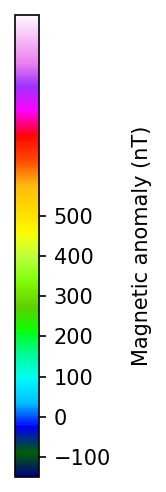
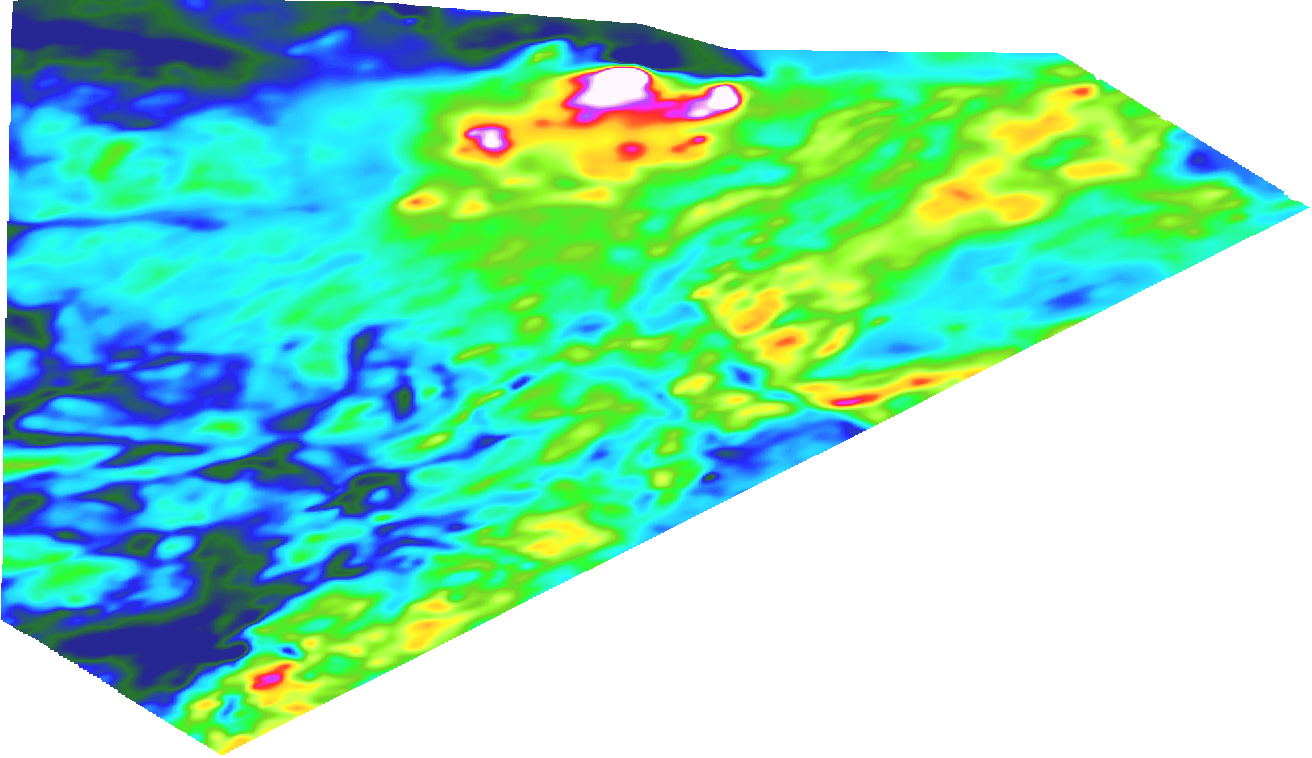

In [326]:
import numpy as np
import io, base64
from matplotlib import cm, colors, pyplot as plt
from PIL import Image
import folium
import rioxarray as rxr
import geopandas as gpd

# --- Reproject raster to EPSG:4326 for web maps ---
da4326 = da.rio.reproject("EPSG:4326")

# --- Build RGBA PNG with transparency ---
arr = da4326.values
if arr.ndim == 3 and arr.shape[0] == 1:
    arr = arr[0]  # ensure 2D
arr = arr.astype(float)
mask = np.isfinite(arr)

# Clamp negative values to 0
#arr[arr < 0] = 0

# Fixed scale 0–500 nT
norm = colors.Normalize(vmin=-150, vmax=1000, clip=True)
rgba = cm.get_cmap("gist_ncar")(norm(arr))
rgba[..., 3] = 0.0
rgba[..., 3][mask] = 0.85
rgba_u8 = (rgba * 255).astype(np.uint8)

Image.fromarray(rgba_u8, mode="RGBA").save("mag_overlay.png")

# --- Bounds for overlay (south,west,north,east) ---
minx, miny, maxx, maxy = da4326.rio.bounds()
bounds = [[miny, minx], [maxy, maxx]]

# --- Polygons to EPSG:4326 ---
gdf4326 = data_REE_gdp.to_crs(4326)

# --- Create Folium map ---
centroid = gdf4326.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=12, tiles="OpenStreetMap")

# Raster overlay
folium.raster_layers.ImageOverlay(
    name="Magnetic survey",
    image="mag_overlay.png",
    bounds=bounds,
    opacity=1.0,
    interactive=False,
).add_to(m)

# Polygon overlay with tooltip
style = lambda f: {"color": "black", "weight": 3, "fillOpacity": 0.0}
folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=["Rettighetsnavn","Rettighetstype","Status","Mineral","Kommunenavn"],
        aliases=["Name","Type","Status","Minerals","Municipality"],
        sticky=False,
    ),
).add_to(m)

# Add polygon labels
#for _, row in gdf4326.iterrows():
#    c = row.geometry.representative_point()
#    last_symbol = row["Rettighetsnavn"].split()[-1]  # get last part of the name
#    folium.Marker(
#        location=[c.y, c.x],
#        icon=folium.DivIcon(
#            icon_size=(-50, 50),
#            html=f'<div style="font-size:15pt; color:black; white-space:nowrap;"><b>{last_symbol}</b></div>'
#        )
#    ).add_to(m)


# --- Create vertical Matplotlib colorbar ---
fig, ax = plt.subplots(figsize=(0.4, 4))
fig.subplots_adjust(left=0.5)
cb = plt.colorbar(
    cm.ScalarMappable(norm=norm, cmap="gist_ncar"),
    cax=ax,
    orientation="vertical",
    ticks=[-100,0,100, 200, 300, 400, 500]
)
cb.set_label("Magnetic anomaly (nT)", rotation=90, labelpad=10)

buf = io.BytesIO()
plt.savefig(buf, format="png", dpi=150, bbox_inches="tight", transparent=True)
plt.close(fig)
legend_data = base64.b64encode(buf.getbuffer()).decode("ascii")

# Add legend to map
legend_html = f"""
<div style="position: fixed;
     top: 100px; right: 15px; width: 150px; height: 500px;
     z-index: 9999; background-color: rgba(255,255,255,0.8);
     padding: 4px; border-radius: 5px; box-shadow: 0 0 4px #555;">
    <img src="data:image/png;base64,{legend_data}" style="width:100%; height:100%;">
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Show the map



#m.save("magneticProperties.html")
m




# Polgyon test

9.25510978133117
59.2485088744277
9.33907248241598
59.2483139543079
9.33889452732342
59.2303802729604
9.25497557320575
59.2305719768863
9.25510978133117
59.2485088744277
(9.25510978133117, 9.33907248241598, 9.33889452732342, 9.25497557320575, 9.25510978133117) (59.2485088744277, 59.2483139543079, 59.2303802729604, 59.2305719768863, 59.2485088744277)


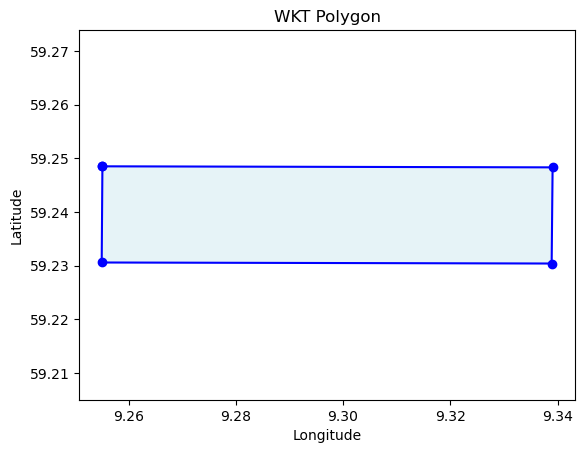

In [277]:
import matplotlib.pyplot as plt

# Your WKT polygon string
wkt_polygon = """POLYGON ((9.25510978133117 59.2485088744277,
          9.33907248241598 59.2483139543079,
          9.33889452732342 59.2303802729604,
          9.25497557320575 59.2305719768863,
          9.25510978133117 59.2485088744277))"""

# Parse WKT string into list of (x, y) tuples
coords = []
for pair in wkt_polygon.replace("POLYGON ((", "").replace("))", "").split(","):
    x_str, y_str = pair.strip().split()

    print(float(x_str))
    print(float(y_str))
    coords.append((float(x_str), float(y_str)))

# Extract X and Y lists for plotting
xs, ys = zip(*coords)
print(xs, ys)

# Plot
plt.figure()
plt.plot(xs, ys, marker='o', color='blue')
plt.fill(xs, ys, alpha=0.3, color='lightblue')
plt.axis('equal')
plt.title("WKT Polygon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



# Check radiocount (Thorium. Uranium, Potasium)

CRS: EPSG:32632
Resolution: (10.0, -10.0)
Shape (rows, cols): (1126, 996)
Bounds: (512159.512796, 6560853.06495, 522119.512796, 6572113.06495)
NoData: nan
Total datapoints: 699765
Number of negative values: 0
Min: -1.1882591247558594
Max: 548.9827880859375
Mean: 13.622798919677734
Variance: 992.9630126953125


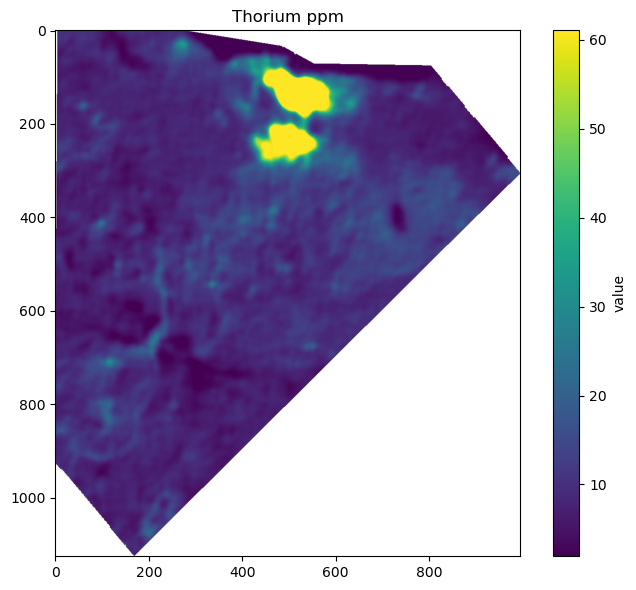

CRS: EPSG:32632
Resolution: (10.0, -10.0)
Shape (rows, cols): (1126, 996)
Bounds: (512159.512796, 6560853.06495, 522119.512796, 6572113.06495)
NoData: nan
Total datapoints: 699765
Number of negative values: 0
Min: -0.6137186288833618
Max: 41.68305206298828
Mean: 3.292670726776123
Variance: 4.387577533721924


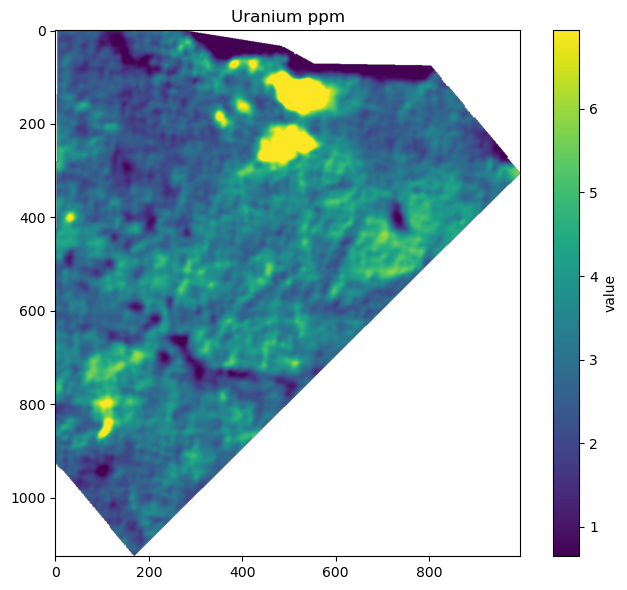

CRS: EPSG:32632
Resolution: (10.0, -10.0)
Shape (rows, cols): (1126, 996)
Bounds: (512159.512796, 6560853.06495, 522119.512796, 6572113.06495)
NoData: nan
Total datapoints: 699765
Number of negative values: 0
Min: -0.3823917806148529
Max: 4.81158447265625
Mean: 1.669070839881897
Variance: 0.2248374968767166


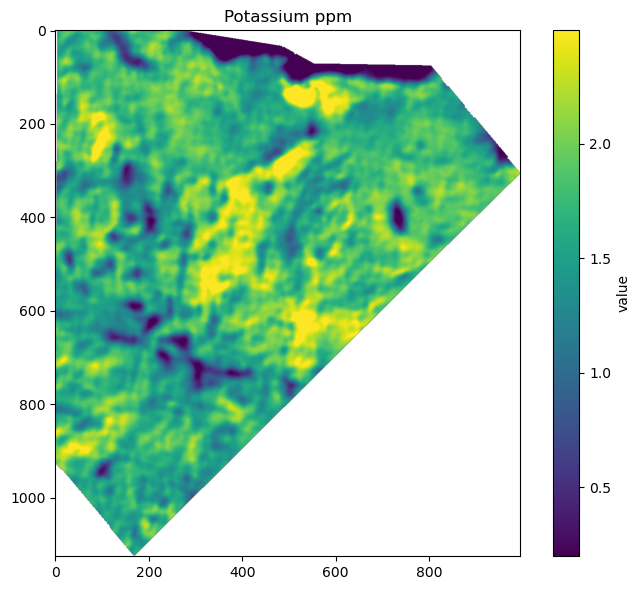

CRS: EPSG:32632
Resolution: (10.0, -10.0)
Shape (rows, cols): (1126, 996)
Bounds: (512159.512796, 6560853.06495, 522119.512796, 6572113.06495)
NoData: nan
Total datapoints: 699765
Number of negative values: 17257
Min: 37.701171875
Max: 9279.6484375
Mean: 560.8727416992188
Variance: 229081.21875


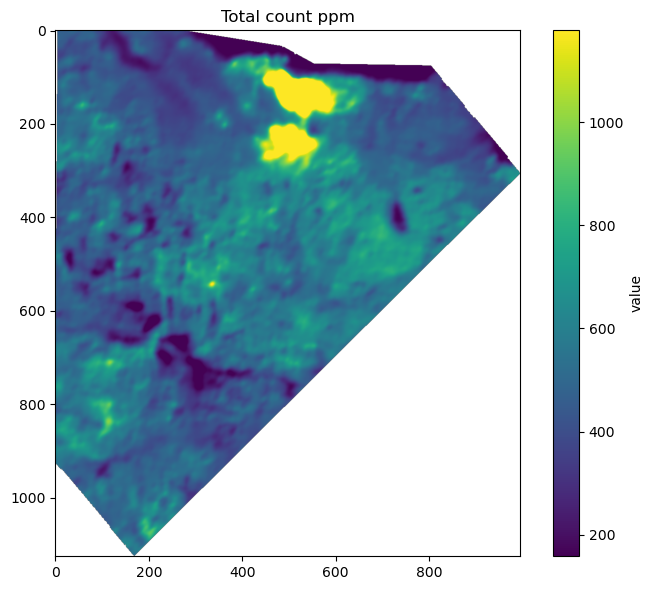

In [306]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt

# Path to your raster
#ERS_PATH = "/Users/erlend/RareEarthProject/MAG_Ulefoss_2024/TMI.ERS"
THORIUM_PATH = "/Users/erlend/RareEarthProject/Thorium/Thorium.ERS"
URANIUM_PATH = "/Users/erlend/RareEarthProject/Uranium/Uranium.ERS"
POTASSIUM_PATH = "/Users/erlend/RareEarthProject/Potassium/Potassium.ERS"
TOTAL_PATH = "/Users/erlend/RareEarthProject/TotalCount/TotalCount.ERS"


# Load raster
da_thorium = rxr.open_rasterio(THORIUM_PATH, masked=True).squeeze(drop=True)
da_uranium = rxr.open_rasterio(URANIUM_PATH, masked=True).squeeze(drop=True)
da_potassium = rxr.open_rasterio(POTASSIUM_PATH, masked=True).squeeze(drop=True)
da_total = rxr.open_rasterio(TOTAL_PATH, masked=True).squeeze(drop=True)


ers_list = [da_thorium, da_uranium, da_potassium, da_total]
ers_names = ["Thorium ppm", "Uranium ppm", "Potassium ppm", "Total count ppm"]


for i,da in enumerate(ers_list):
    print("CRS:", da.rio.crs)
    print("Resolution:", da.rio.resolution())
    print("Shape (rows, cols):", da.shape)
    print("Bounds:", da.rio.bounds())
    print("NoData:", da.rio.nodata)

    # Get numpy array and flatten valid values
    vals = da.values
    valid = vals.compressed() if np.ma.isMaskedArray(vals) else vals.ravel()
    valid = valid[np.isfinite(valid)]

    # Stats
    total_points = valid.size
    count_neg = (valid > 1000).sum()

    min_val = valid.min()
    max_val = valid.max()
    mean_val = valid.mean()
    var_val = valid.var()  # ddof=0 for population variance

    print(f"Total datapoints: {total_points}")
    print(f"Number of negative values: {count_neg}")
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    print(f"Mean: {mean_val}")
    print(f"Variance: {var_val}")

    # Stretch for display (2–98 percentile)
    p2, p98 = np.percentile(valid, [2, 98]) if valid.size else (None, None)

    plt.figure(figsize=(7, 6))
    im = plt.imshow(vals, vmin=p2, vmax=p98)
    plt.colorbar(im, label="value")
    plt.title(ers_names[i])
    plt.tight_layout()
    plt.show()


## Thorium

/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/691076853.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rgba = cm.get_cmap("gist_ncar")(norm(arr))
/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/691076853.py:84: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = gdf4326.unary_union.centroid
/Users/erlend/anaconda3/lib/python3.12/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)



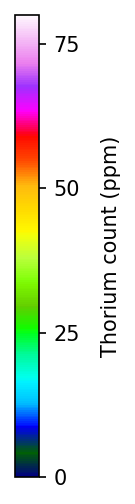
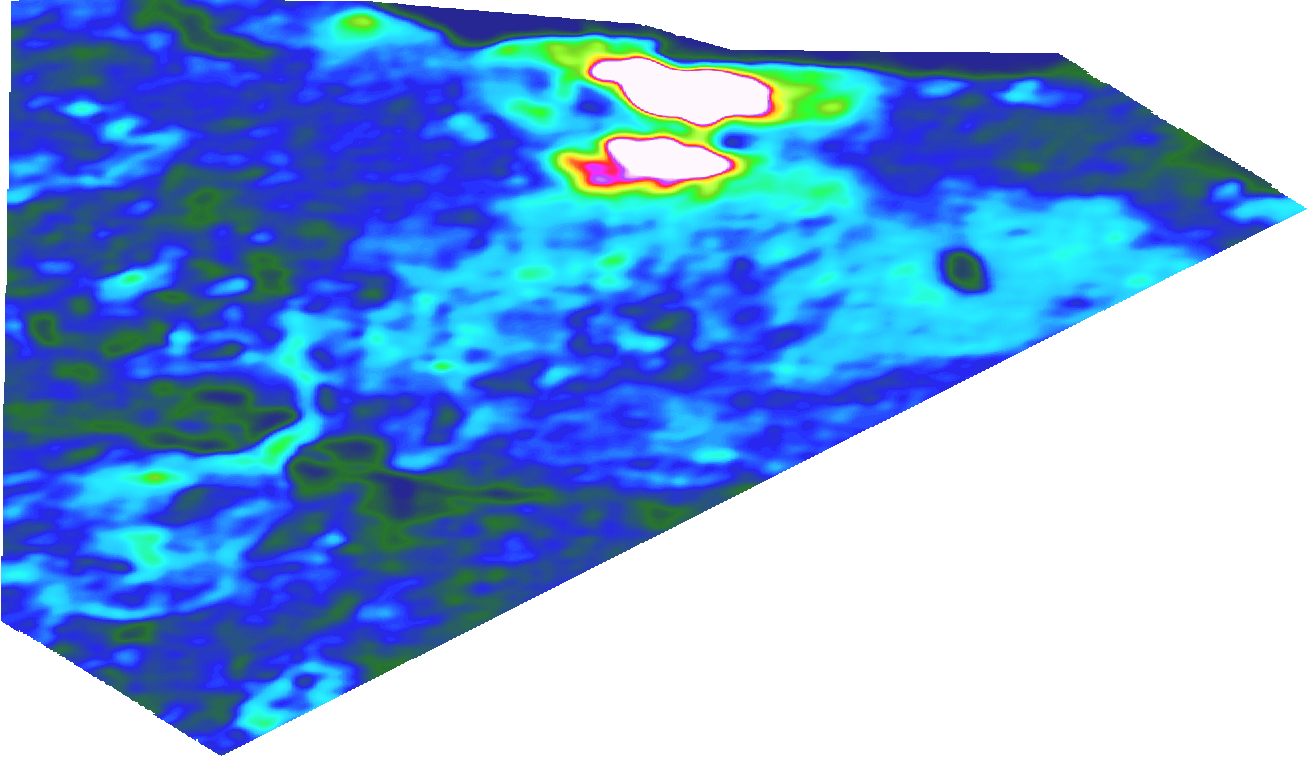

In [320]:
import numpy as np
from matplotlib import colors
from PIL import Image
import folium
import rioxarray as rxr

from shapely.geometry import mapping



# --- Reproject raster to EPSG:4326 for web maps ---
daThorium4326 = da_thorium.rio.reproject("EPSG:4326")

# --- Build RGBA PNG with transparency ---
arr = daThorium4326.values
if arr.ndim == 3 and arr.shape[0] == 1:
    arr = arr[0]  # ensure 2D
arr = arr.astype(float)
mask = np.isfinite(arr)

#norm = colors.Normalize(vmin=-150, vmax=550, clip=True)
#rgba = plt.cm.gist_ncar(norm(arr))
#rgba[..., 3] = 0.0
#rgba[..., 3][mask] = 0.85
#rgba_u8 = (rgba * 255).astype(np.uint8)



norm = colors.Normalize(vmin=0, vmax=80, clip=True)
rgba = cm.get_cmap("gist_ncar")(norm(arr))
rgba[..., 3] = 0.0
rgba[..., 3][mask] = 0.85
rgba_u8 = (rgba * 255).astype(np.uint8)

Image.fromarray(rgba_u8, mode="RGBA").save("thorium_overlay.png")

# --- 3) Bounds for overlay ---
minx, miny, maxx, maxy = daThorium4326.rio.bounds()
bounds = [[miny, minx], [maxy, maxx]]

# --- 4) Polygons to EPSG:4326 ---
gdf4326 = data_REE_gdp.to_crs(4326)

#Add avergage and max magnetif fields: 

avg_list, max_list = [], []
for geom in gdf4326.geometry:
    try:
        clipped = daThorium4326.rio.clip([mapping(geom)], gdf4326.crs, drop=True)
        vals = clipped.values
        if vals.ndim == 3 and vals.shape[0] == 1:
            vals = vals[0]  # 2D

        finite = np.isfinite(vals)
        if finite.any():
            mean_nt = float(np.nanmean(vals))
            max_nt  = float(np.nanmax(vals))
        else:
            mean_nt = np.nan
            max_nt  = np.nan
    except Exception:
        mean_nt = np.nan
        max_nt  = np.nan

    avg_list.append(mean_nt)
    max_list.append(max_nt)

gdf4326["AvgTh_ppm"] = avg_list
gdf4326["MaxTh_ppm"] = max_list
gdf4326["AvgTh_ppm_str"] = gdf4326["AvgTh_ppm"].map(lambda x: f"{x:.1f}" if np.isfinite(x) else "N/A")
gdf4326["MaxTh_ppm_str"] = gdf4326["MaxTh_ppm"].map(lambda x: f"{x:.1f}" if np.isfinite(x) else "N/A")



# --- 5) Assign fixed colours by Rettighetshaver ---
unique_owners = gdf4326["Rettighetshaver"].unique()
base_colors = ["green", "blue", "red"]
colors_map = {
    owner: base_colors[i % len(base_colors)]
    for i, owner in enumerate(unique_owners)
}

# --- 6) Folium base map ---
centroid = gdf4326.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=12, tiles="OpenStreetMap", control_scale=True)

# --- 7) Add raster overlay ---
folium.raster_layers.ImageOverlay(
    name="Magnetic survey",
    image="thorium_overlay.png",
    bounds=bounds,
    opacity=0.9,
    interactive=False,
).add_to(m)

# --- 8) Add polygons with colours by Rettighetshaver
style = lambda f: {
    "color": colors_map[f["properties"]["Rettighetshaver"]],
    "weight": 2.5,
    "fillOpacity": 0.0,
}
folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=[
            "Rettighetshaver",
            "Rettighetsnavn",
            "Rettighetstype",
            "Organisasjonsnummer",
            "Status",
            "Mineral",
            "Kommunenavn",
            "AvgTh_ppm_str",
            "MaxTh_ppm_str"

        ],
        aliases=[
            "Owner",
            "Name",
            "Type",
            "Organisation number",
            "Status",
            "Minerals",
            "Municipality",
            "Average Th ppm",
            "Max Th ppm"
        ],
        sticky=False,
    ),
).add_to(m)

# --- 9) Add labels (last token of Rettighetsnavn) ---
for _, row in gdf4326.iterrows():
    c = row.geometry.representative_point()
    last_token = row["Rettighetsnavn"].split()[-1]
    folium.Marker(
        location=[c.y, c.x],
        icon=folium.DivIcon(
            icon_size=(0, 20),
            html=f'<div style="font-size:10pt; color:black;"><b>{last_token}</b></div>',
        ),
    ).add_to(m)

# --- 10) Add legend ---
legend_html = """
<div style="
    position: fixed; 
    bottom: 550px; left: 50px; width: 200px;  padding: 4px; border-radius: 5px;
    background-color: white; 
    border:2px solid grey; 
    z-index:9999; 
    font-size:15px;
    ">
<b>Mining rights</b><br>
"""
for owner, color in colors_map.items():
    legend_html += f'<i style="background:{color};width:10px;height:10px;display:inline-block;"></i> {owner}<br>'
legend_html += "</div>"

m.get_root().html.add_child(folium.Element(legend_html))


# --- Create vertical Matplotlib colorbar ---
fig, ax = plt.subplots(figsize=(0.4, 4))
fig.subplots_adjust(left=0.5)
cb = plt.colorbar(
    cm.ScalarMappable(norm=norm, cmap="gist_ncar"),
    cax=ax,
    orientation="vertical",
    ticks=[0,25,50,75,100]
)
cb.set_label("Thorium count (ppm)", rotation=90, labelpad=10)

buf = io.BytesIO()
plt.savefig(buf, format="png", dpi=150, bbox_inches="tight", transparent=True)
plt.close(fig)
legend_data = base64.b64encode(buf.getbuffer()).decode("ascii")

legend_magnetic_html = f"""
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 120px; 
     z-index: 9999; background-color: rgba(255,255,255,0.8);
     padding: 4px; border-radius: 5px; box-shadow: 0 0 4px #555;">
    <img src="data:image/png;base64,{legend_data}" style="width:100%; height:100%;">
</div>
"""
m.get_root().html.add_child(folium.Element(legend_magnetic_html))

folium.LayerControl().add_to(m)
m.save("ThoriumCheck.html")



m

# Uranium

/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/3365986346.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rgba = cm.get_cmap("gist_ncar")(norm(arr))
/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/3365986346.py:84: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = gdf4326.unary_union.centroid
/Users/erlend/anaconda3/lib/python3.12/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)



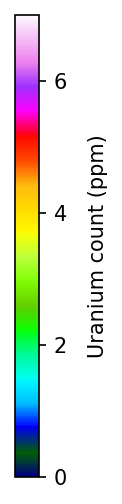
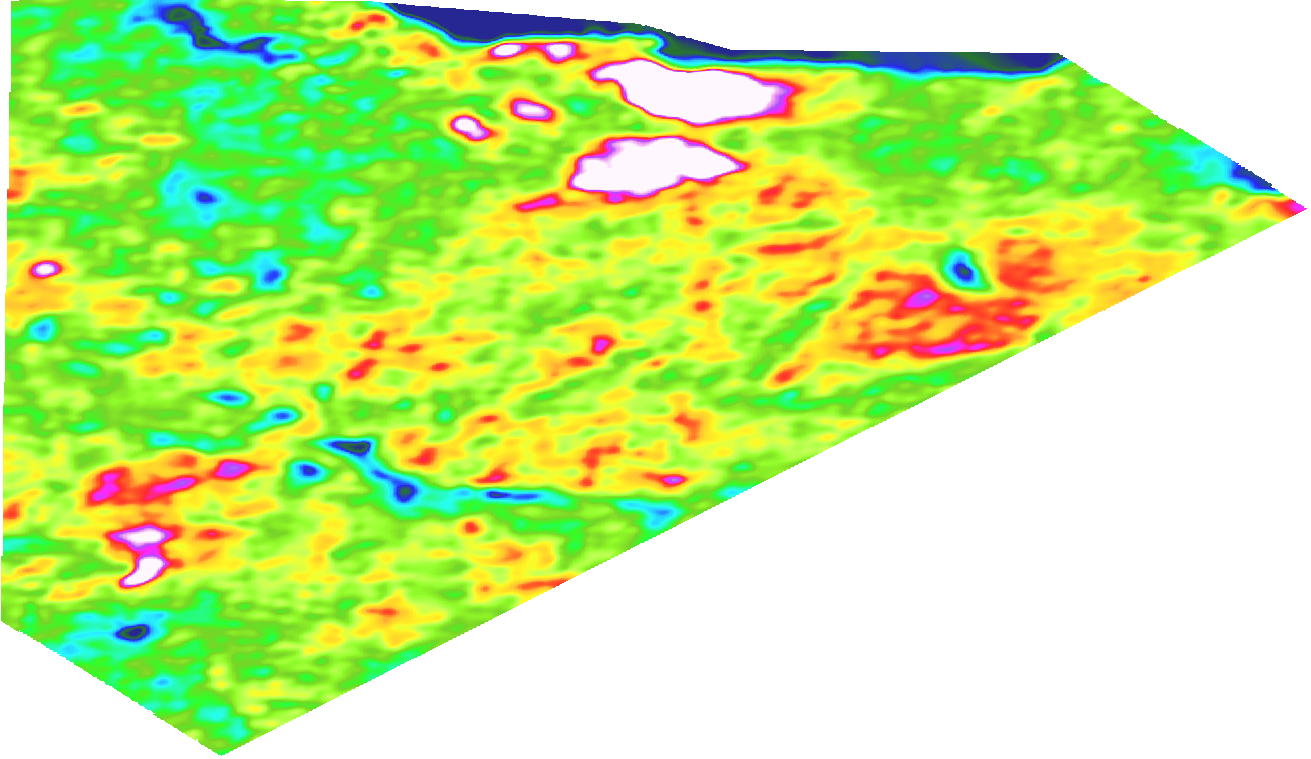

In [319]:
import numpy as np
from matplotlib import colors
from PIL import Image
import folium
import rioxarray as rxr

from shapely.geometry import mapping



# --- Reproject raster to EPSG:4326 for web maps ---
daUranium4326 = da_uranium.rio.reproject("EPSG:4326")

# --- Build RGBA PNG with transparency ---
arr = daUranium4326.values
if arr.ndim == 3 and arr.shape[0] == 1:
    arr = arr[0]  # ensure 2D
arr = arr.astype(float)
mask = np.isfinite(arr)

#norm = colors.Normalize(vmin=-150, vmax=550, clip=True)
#rgba = plt.cm.gist_ncar(norm(arr))
#rgba[..., 3] = 0.0
#rgba[..., 3][mask] = 0.85
#rgba_u8 = (rgba * 255).astype(np.uint8)



norm = colors.Normalize(vmin=0, vmax=7, clip=True)
rgba = cm.get_cmap("gist_ncar")(norm(arr))
rgba[..., 3] = 0.0
rgba[..., 3][mask] = 0.85
rgba_u8 = (rgba * 255).astype(np.uint8)

Image.fromarray(rgba_u8, mode="RGBA").save("Uranium_overlay.png")

# --- 3) Bounds for overlay ---
minx, miny, maxx, maxy = daUranium4326.rio.bounds()
bounds = [[miny, minx], [maxy, maxx]]

# --- 4) Polygons to EPSG:4326 ---
gdf4326 = data_REE_gdp.to_crs(4326)

#Add avergage and max magnetif fields: 

avg_list, max_list = [], []
for geom in gdf4326.geometry:
    try:
        clipped = daUranium4326.rio.clip([mapping(geom)], gdf4326.crs, drop=True)
        vals = clipped.values
        if vals.ndim == 3 and vals.shape[0] == 1:
            vals = vals[0]  # 2D

        finite = np.isfinite(vals)
        if finite.any():
            mean_nt = float(np.nanmean(vals))
            max_nt  = float(np.nanmax(vals))
        else:
            mean_nt = np.nan
            max_nt  = np.nan
    except Exception:
        mean_nt = np.nan
        max_nt  = np.nan

    avg_list.append(mean_nt)
    max_list.append(max_nt)

gdf4326["AvgUr_ppm"] = avg_list
gdf4326["MaxUr_ppm"] = max_list
gdf4326["AvgUr_ppm_str"] = gdf4326["AvgUr_ppm"].map(lambda x: f"{x:.1f}" if np.isfinite(x) else "N/A")
gdf4326["MaxUr_ppm_str"] = gdf4326["MaxUr_ppm"].map(lambda x: f"{x:.1f}" if np.isfinite(x) else "N/A")



# --- 5) Assign fixed colours by Rettighetshaver ---
unique_owners = gdf4326["Rettighetshaver"].unique()
base_colors = ["green", "blue", "red"]
colors_map = {
    owner: base_colors[i % len(base_colors)]
    for i, owner in enumerate(unique_owners)
}

# --- 6) Folium base map ---
centroid = gdf4326.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=12, tiles="OpenStreetMap", control_scale=True)

# --- 7) Add raster overlay ---
folium.raster_layers.ImageOverlay(
    name="Magnetic survey",
    image="Uranium_overlay.png",
    bounds=bounds,
    opacity=0.9,
    interactive=False,
).add_to(m)

# --- 8) Add polygons with colours by Rettighetshaver
style = lambda f: {
    "color": colors_map[f["properties"]["Rettighetshaver"]],
    "weight": 2.5,
    "fillOpacity": 0.0,
}
folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=[
            "Rettighetshaver",
            "Rettighetsnavn",
            "Rettighetstype",
            "Organisasjonsnummer",
            "Status",
            "Mineral",
            "Kommunenavn",
            "AvgUr_ppm_str",
            "MaxUr_ppm_str"

        ],
        aliases=[
            "Owner",
            "Name",
            "Type",
            "Organisation number",
            "Status",
            "Minerals",
            "Municipality",
            "Average Th ppm",
            "Max Th ppm"
        ],
        sticky=False,
    ),
).add_to(m)

# --- 9) Add labels (last token of Rettighetsnavn) ---
for _, row in gdf4326.iterrows():
    c = row.geometry.representative_point()
    last_token = row["Rettighetsnavn"].split()[-1]
    folium.Marker(
        location=[c.y, c.x],
        icon=folium.DivIcon(
            icon_size=(0, 20),
            html=f'<div style="font-size:10pt; color:black;"><b>{last_token}</b></div>',
        ),
    ).add_to(m)

# --- 10) Add legend ---
legend_html = """
<div style="
    position: fixed; 
    bottom: 550px; left: 50px; width: 200px;  padding: 4px; border-radius: 5px;
    background-color: white; 
    border:2px solid grey; 
    z-index:9999; 
    font-size:15px;
    ">
<b>Mining rights</b><br>
"""
for owner, color in colors_map.items():
    legend_html += f'<i style="background:{color};width:10px;height:10px;display:inline-block;"></i> {owner}<br>'
legend_html += "</div>"

m.get_root().html.add_child(folium.Element(legend_html))


# --- Create vertical Matplotlib colorbar ---
fig, ax = plt.subplots(figsize=(0.4, 4))
fig.subplots_adjust(left=0.5)
cb = plt.colorbar(
    cm.ScalarMappable(norm=norm, cmap="gist_ncar"),
    cax=ax,
    orientation="vertical",
    ticks=[0,2,4,6,8]
)
cb.set_label("Uranium count (ppm)", rotation=90, labelpad=10)

buf = io.BytesIO()
plt.savefig(buf, format="png", dpi=150, bbox_inches="tight", transparent=True)
plt.close(fig)
legend_data = base64.b64encode(buf.getbuffer()).decode("ascii")

legend_magnetic_html = f"""
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 120px; 
     z-index: 9999; background-color: rgba(255,255,255,0.8);
     padding: 4px; border-radius: 5px; box-shadow: 0 0 4px #555;">
    <img src="data:image/png;base64,{legend_data}" style="width:100%; height:100%;">
</div>
"""
m.get_root().html.add_child(folium.Element(legend_magnetic_html))

folium.LayerControl().add_to(m)
m.save("UraniumCheck.html")



m

# Potassium 

/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/537994350.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rgba = cm.get_cmap("gist_ncar")(norm(arr))
/var/folders/52/h0khbcc10wgdr52l2lm52cy00000gn/T/ipykernel_96637/537994350.py:84: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centroid = gdf4326.unary_union.centroid
/Users/erlend/anaconda3/lib/python3.12/site-packages/shapely/set_operations.py:553: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)



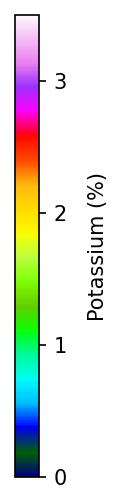
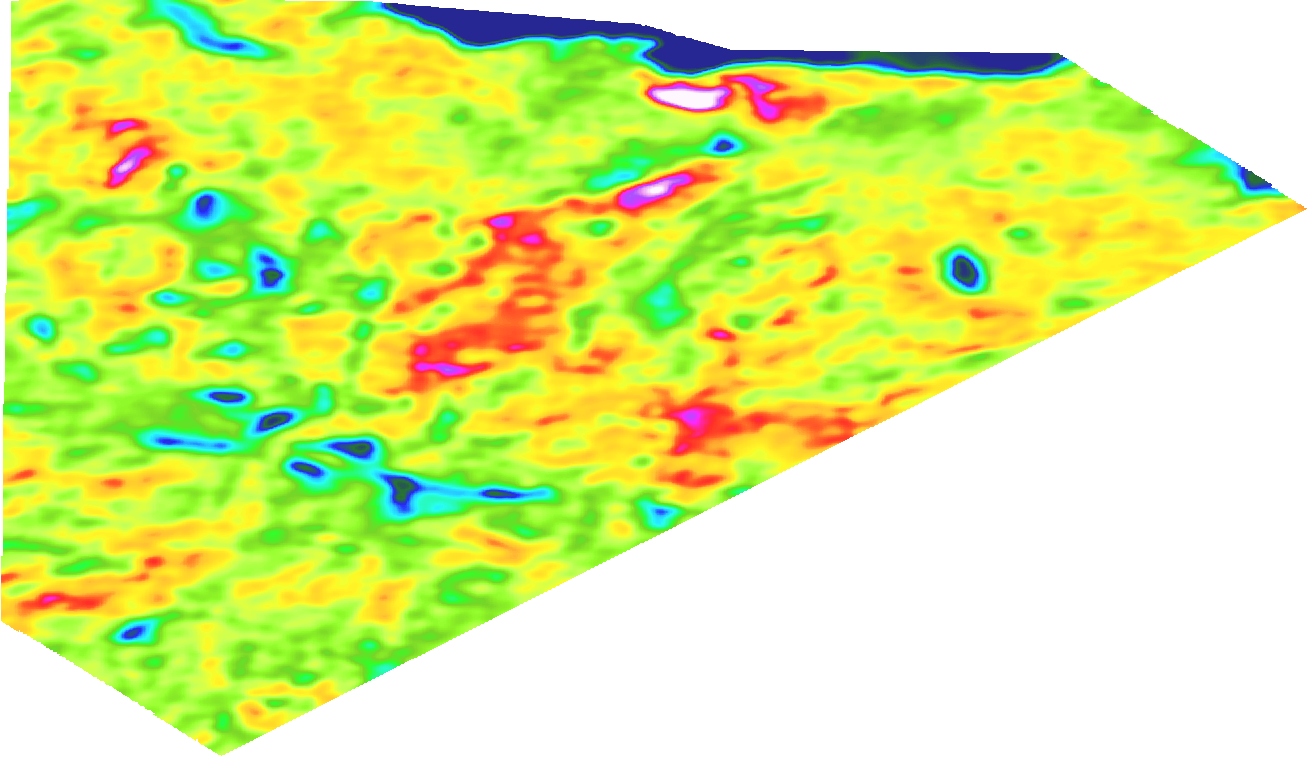

In [327]:
import numpy as np
from matplotlib import colors
from PIL import Image
import folium
import rioxarray as rxr

from shapely.geometry import mapping



# --- Reproject raster to EPSG:4326 for web maps ---
daPotassium4326 = da_potassium.rio.reproject("EPSG:4326")

# --- Build RGBA PNG with transparency ---
arr = daPotassium4326.values
if arr.ndim == 3 and arr.shape[0] == 1:
    arr = arr[0]  # ensure 2D
arr = arr.astype(float)
mask = np.isfinite(arr)

#norm = colors.Normalize(vmin=-150, vmax=550, clip=True)
#rgba = plt.cm.gist_ncar(norm(arr))
#rgba[..., 3] = 0.0
#rgba[..., 3][mask] = 0.85
#rgba_u8 = (rgba * 255).astype(np.uint8)



norm = colors.Normalize(vmin=0, vmax=3.5, clip=True)
rgba = cm.get_cmap("gist_ncar")(norm(arr))
rgba[..., 3] = 0.0
rgba[..., 3][mask] = 0.85
rgba_u8 = (rgba * 255).astype(np.uint8)

Image.fromarray(rgba_u8, mode="RGBA").save("Potassium_overlay.png")

# --- 3) Bounds for overlay ---
minx, miny, maxx, maxy = daPotassium4326.rio.bounds()
bounds = [[miny, minx], [maxy, maxx]]

# --- 4) Polygons to EPSG:4326 ---
gdf4326 = data_REE_gdp.to_crs(4326)

#Add avergage and max magnetif fields: 

avg_list, max_list = [], []
for geom in gdf4326.geometry:
    try:
        clipped = daPotassium4326.rio.clip([mapping(geom)], gdf4326.crs, drop=True)
        vals = clipped.values
        if vals.ndim == 3 and vals.shape[0] == 1:
            vals = vals[0]  # 2D

        finite = np.isfinite(vals)
        if finite.any():
            mean_nt = float(np.nanmean(vals))
            max_nt  = float(np.nanmax(vals))
        else:
            mean_nt = np.nan
            max_nt  = np.nan
    except Exception:
        mean_nt = np.nan
        max_nt  = np.nan

    avg_list.append(mean_nt)
    max_list.append(max_nt)

gdf4326["AvgK_ppm"] = avg_list
gdf4326["MaxK_ppm"] = max_list
gdf4326["AvgK_ppm_str"] = gdf4326["AvgK_ppm"].map(lambda x: f"{x:.1f}" if np.isfinite(x) else "N/A")
gdf4326["MaxK_ppm_str"] = gdf4326["MaxK_ppm"].map(lambda x: f"{x:.1f}" if np.isfinite(x) else "N/A")



# --- 5) Assign fixed colours by Rettighetshaver ---
unique_owners = gdf4326["Rettighetshaver"].unique()
base_colors = ["green", "blue", "red"]
colors_map = {
    owner: base_colors[i % len(base_colors)]
    for i, owner in enumerate(unique_owners)
}

# --- 6) Folium base map ---
centroid = gdf4326.unary_union.centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=12, tiles="OpenStreetMap", control_scale=True)

# --- 7) Add raster overlay ---
folium.raster_layers.ImageOverlay(
    name="Magnetic survey",
    image="Potassium_overlay.png",
    bounds=bounds,
    opacity=0.9,
    interactive=False,
).add_to(m)

# --- 8) Add polygons with colours by Rettighetshaver
style = lambda f: {
    "color": colors_map[f["properties"]["Rettighetshaver"]],
    "weight": 2.5,
    "fillOpacity": 0.0,
}
folium.GeoJson(
    gdf4326.__geo_interface__,
    name="REE mining rights",
    style_function=style,
    tooltip=folium.GeoJsonTooltip(
        fields=[
            "Rettighetshaver",
            "Rettighetsnavn",
            "Rettighetstype",
            "Organisasjonsnummer",
            "Status",
            "Mineral",
            "Kommunenavn",
            "AvgK_ppm_str",
            "MaxK_ppm_str"

        ],
        aliases=[
            "Owner",
            "Name",
            "Type",
            "Organisation number",
            "Status",
            "Minerals",
            "Municipality",
            "Average Potassium ppm",
            "Max Potassium ppm"
        ],
        sticky=False,
    ),
).add_to(m)

# --- 9) Add labels (last token of Rettighetsnavn) ---
for _, row in gdf4326.iterrows():
    c = row.geometry.representative_point()
    last_token = row["Rettighetsnavn"].split()[-1]
    folium.Marker(
        location=[c.y, c.x],
        icon=folium.DivIcon(
            icon_size=(0, 20),
            html=f'<div style="font-size:10pt; color:black;"><b>{last_token}</b></div>',
        ),
    ).add_to(m)

# --- 10) Add legend ---
legend_html = """
<div style="
    position: fixed; 
    bottom: 550px; left: 50px; width: 200px;  padding: 4px; border-radius: 5px;
    background-color: white; 
    border:2px solid grey; 
    z-index:9999; 
    font-size:15px;
    ">
<b>Mining rights</b><br>
"""
for owner, color in colors_map.items():
    legend_html += f'<i style="background:{color};width:10px;height:10px;display:inline-block;"></i> {owner}<br>'
legend_html += "</div>"

m.get_root().html.add_child(folium.Element(legend_html))


# --- Create vertical Matplotlib colorbar ---
fig, ax = plt.subplots(figsize=(0.4, 4))
fig.subplots_adjust(left=0.5)
cb = plt.colorbar(
    cm.ScalarMappable(norm=norm, cmap="gist_ncar"),
    cax=ax,
    orientation="vertical",
    ticks=[0,1.0, 2.0, 3.0]
)
cb.set_label("Potassium (%)", rotation=90, labelpad=10)

buf = io.BytesIO()
plt.savefig(buf, format="png", dpi=150, bbox_inches="tight", transparent=True)
plt.close(fig)
legend_data = base64.b64encode(buf.getbuffer()).decode("ascii")

legend_magnetic_html = f"""
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 120px; 
     z-index: 9999; background-color: rgba(255,255,255,0.8);
     padding: 4px; border-radius: 5px; box-shadow: 0 0 4px #555;">
    <img src="data:image/png;base64,{legend_data}" style="width:100%; height:100%;">
</div>
"""
m.get_root().html.add_child(folium.Element(legend_magnetic_html))

folium.LayerControl().add_to(m)
m.save("PotassiumCheck.html")



m